<a href="https://colab.research.google.com/github/stokljos/CTD-data-analysis/blob/master/Project_4_Hydrophone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade seaborn==0.9.0 
!pip install obspy 
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

%matplotlib inline

from scipy.fftpack import fft

Data From The Oregon Shelf Cabled Benthic Experiment Package 

In [0]:
#1.not windy nor rainy
url1 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/06/19/OO-HYEA2--YDH-2019-06-19T15:20:00.000015.mseed'
data1= read(url1)
#2.windy but not rainy
url2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/12/14/OO-HYEA2--YDH-2019-12-14T03:48:07.738000.mseed'
data2= read(url2)
#3.rainy but not windy
url3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/08/OO-HYEA2--YDH-2019-01-08T09:00:00.000016.mseed'
data3= read(url3)
#4.windy and rainy
url4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/06/OO-HYEA2--YDH-2019-01-06T13:00:00.000015.mseed'
data4= read(url4)

Data From The Oregon Offshore Cabled Benthic Experiment Package 

In [0]:
#5.not windy nor rainy
url5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/02/OO-HYEA1--YDH-2019-03-02T09:00:00.000015.mseed'
data5= read(url5)
#6.windy but not rainy
url6 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/01/OO-HYEA1--YDH-2019-02-01T02:00:00.000016.mseed'
data6= read(url6)
#7.rainy but not windy
url7= 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/20/OO-HYEA1--YDH-2019-01-20T10:00:00.000015.mseed'
data7= read(url7)
#8.windy and rainy
url8 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/06/OO-HYEA1--YDH-2019-01-06T13:00:00.000000.mseed'
data8= read(url8)


Calculating Power Spectral Density

In [0]:
def psdPlot(st):
  psdAvg = 0
  psdSum = 0
  K=0
  for i in range(0,(int(st[0].stats.endtime.timestamp)-int(st[0].stats.starttime.timestamp))):
    t_start = st[0].stats.starttime+i
    t_end = t_start+1
    sliced = st.slice(t_start, t_end)
    x = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft = 2*np.square(fft(x,64000))/(len(x)*64000)
    fre = np.linspace(1,64000,64000)
    data_db = 10*np.log10(np.abs(xfft))+169-128.9 #This has to be summed together and divided by counter K 
    psdSum += data_db
    K+=1
  psdAvg = psdSum/K
  fig, host = plt.subplots(figsize=(18,9))
  host.plot(fre[0:32000], psdAvg[0:32000],label='PSD')
  fmin=0
  fmax=15000
  host.set_title('PSD vs. Frequency')
  host.tick_params(gridOn=True)
  host.set_xlabel('Frequency (Hz)', fontsize = 15)
  host.set_ylabel('PSD (W/Hz)', fontsize = 15)

Plotting PSD vs Frequency for Oregon Shelf Cabled Benthic Experiment Package

PSD vs Frequency for Oregon Shelf Cabled Benthic Experiment Package


Text(0.5, 1.0, 'Rainy and Windy')

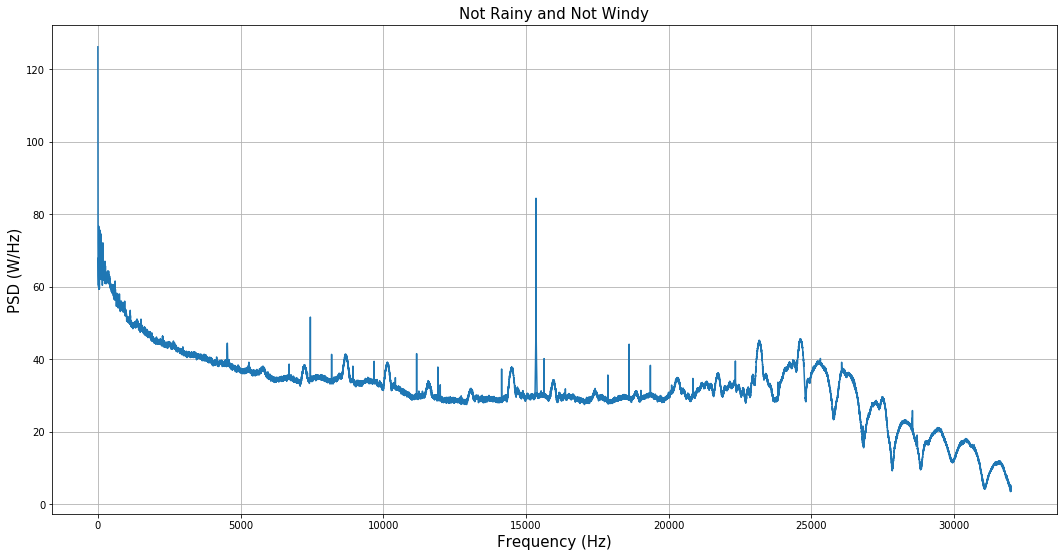

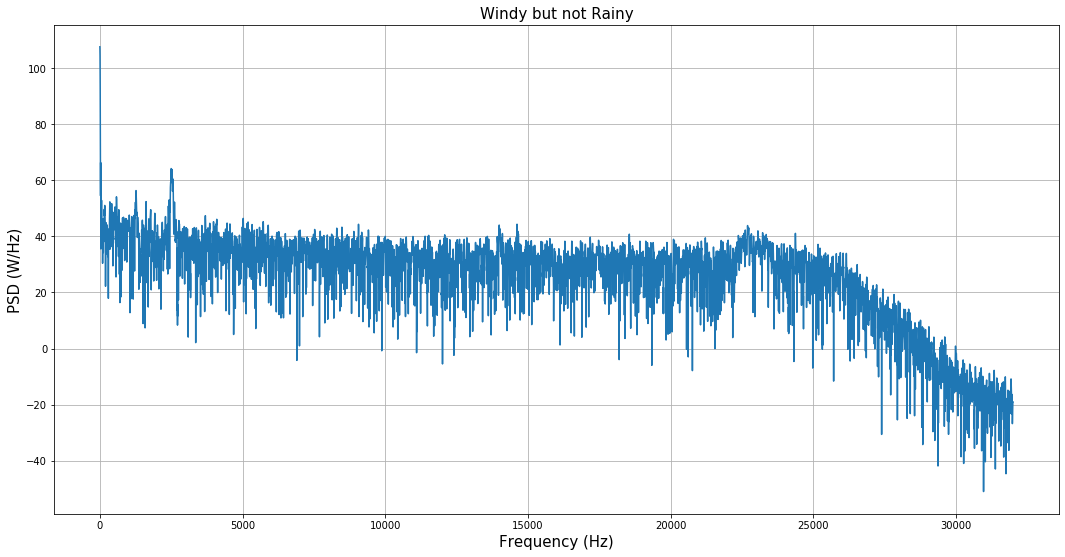

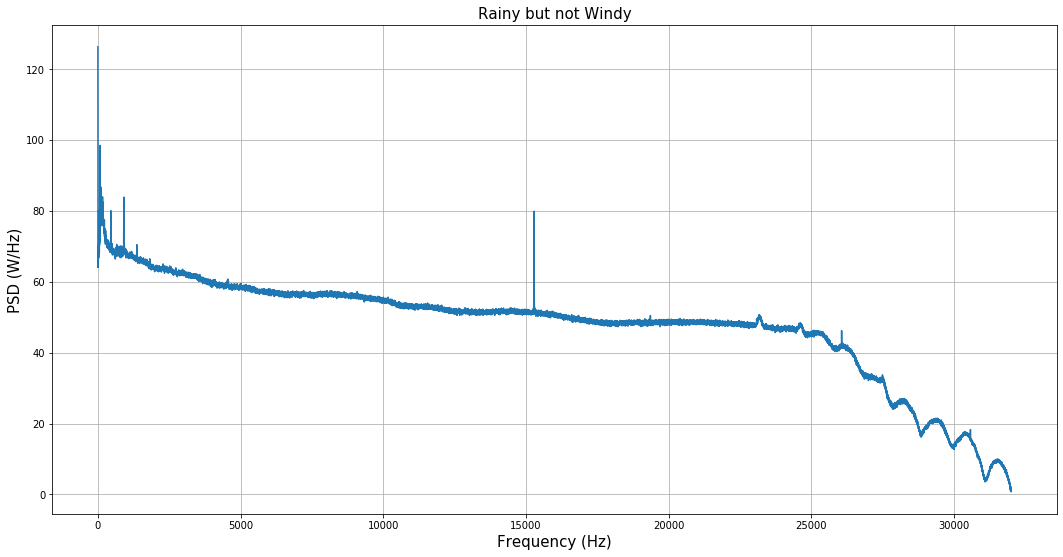

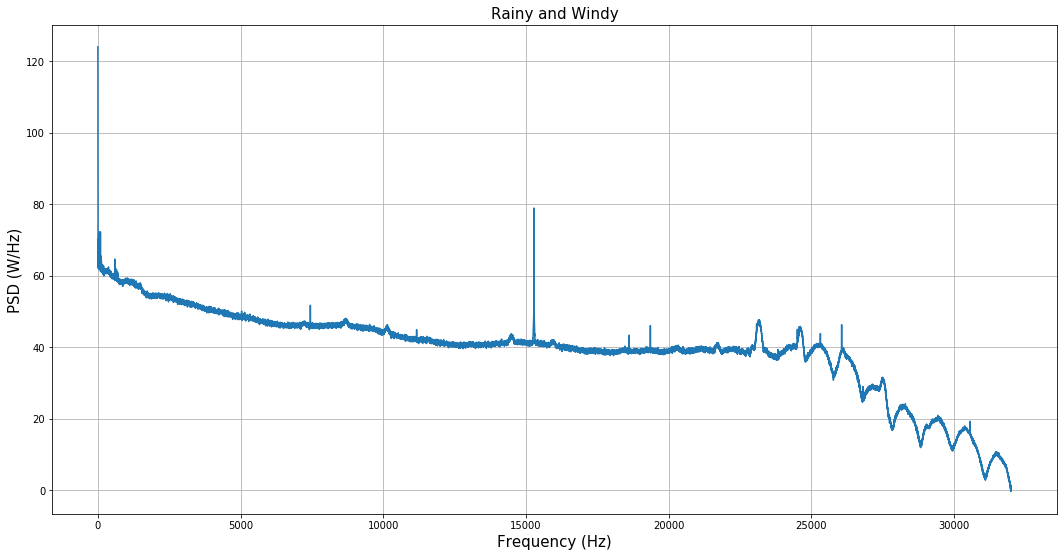

In [5]:
print('\033[1m' + 'PSD vs Frequency for Oregon Shelf Cabled Benthic Experiment Package')
psdPlot(data1)
plt.title('Not Rainy and Not Windy', fontsize = 15)

psdPlot(data2)
plt.title('Windy but not Rainy', fontsize = 15)

psdPlot(data3)
plt.title('Rainy but not Windy', fontsize = 15)

psdPlot(data4)
plt.title('Rainy and Windy', fontsize = 15)


Plotting PSD vs Frequency for Oregon Offshore Cabled Benthic Experiment Package

PSD vs Frequency for Oregon Offshore Cabled Benthic Experiment Package


Text(0.5, 1.0, 'OOCB - Rainy and Windy')

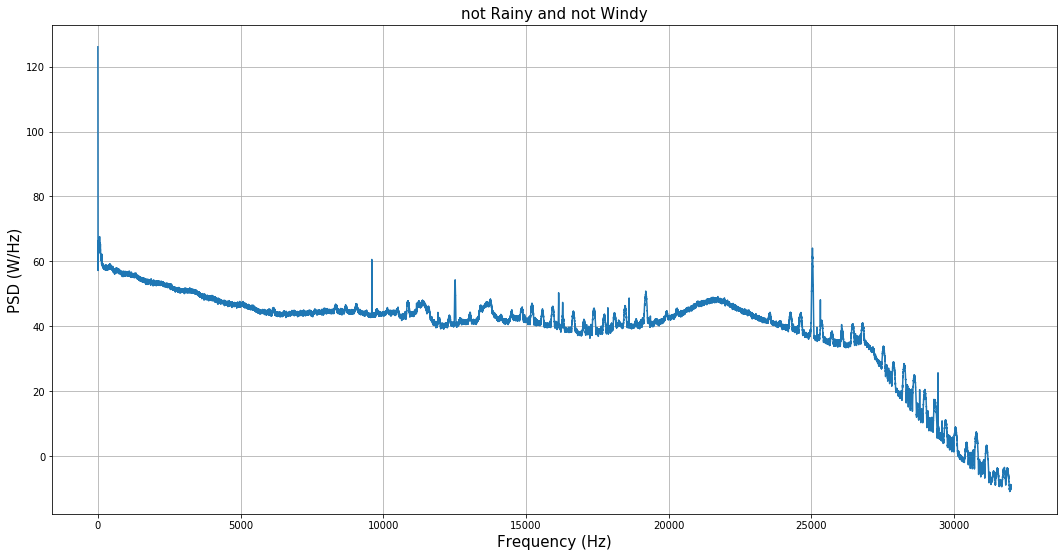

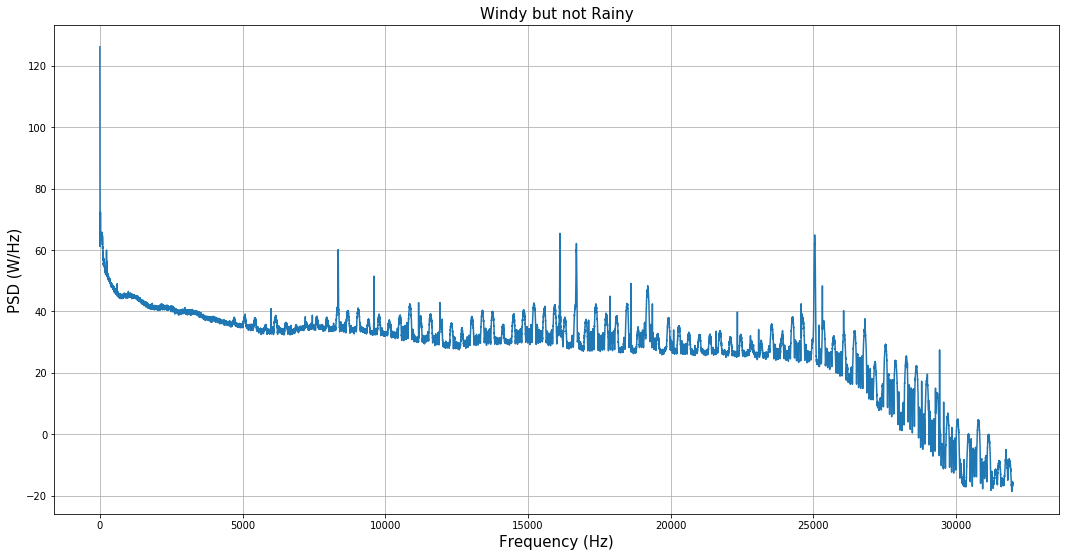

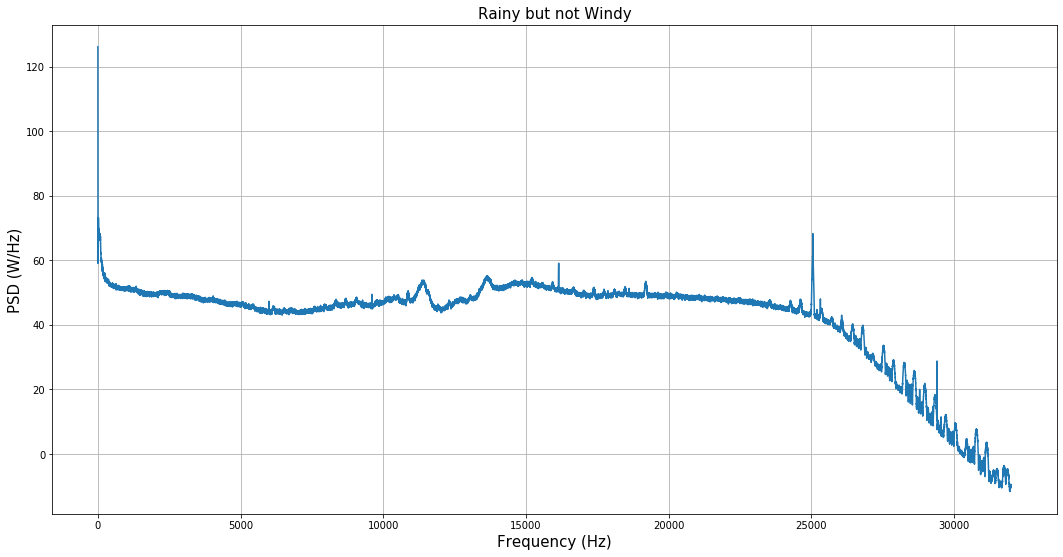

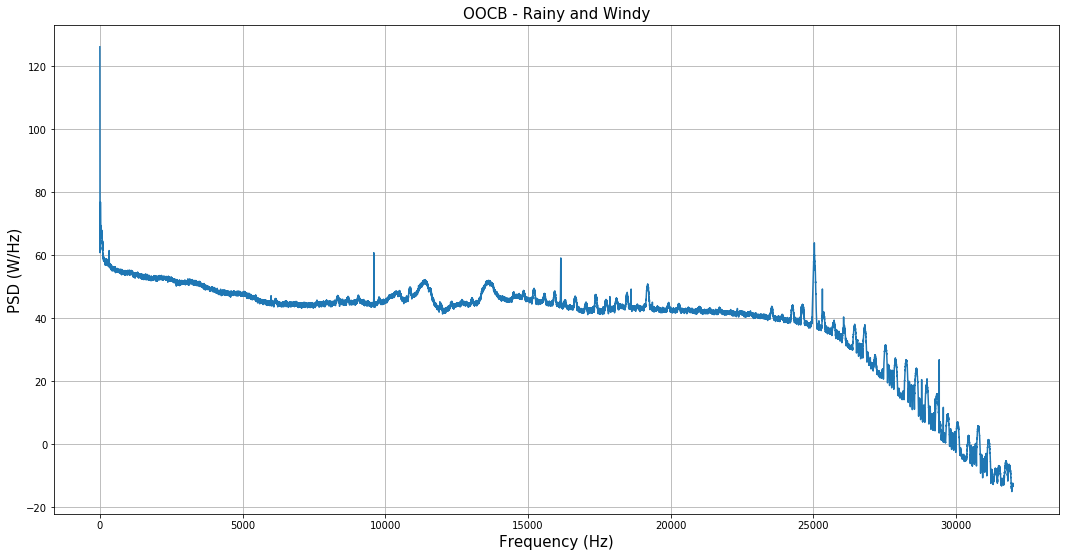

In [6]:
print('\033[1m' + 'PSD vs Frequency for Oregon Offshore Cabled Benthic Experiment Package')
psdPlot(data5)
plt.title('not Rainy and not Windy', fontsize = 15)

psdPlot(data6)
plt.title('Windy but not Rainy', fontsize = 15)

psdPlot(data7)
plt.title('Rainy but not Windy', fontsize = 15)

psdPlot(data8)
plt.title('OOCB - Rainy and Windy', fontsize = 15)

Plotting Spectrogram for Mammal Frequency vs Time

(0, 5000)

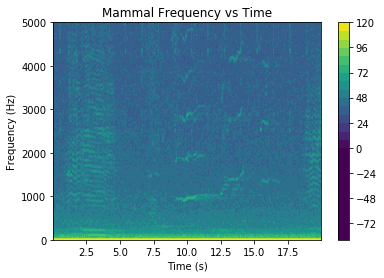

In [7]:
data = read('https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed')
fs = 64000
timeStart = data[0].stats.starttime
timeEnd = data[0].stats.starttime + 20
sliced = data.slice(timeStart, timeEnd)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  
per_lap = 0.90      
nlap = int(nfft * float(per_lap))   

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Mammal Frequency vs Time')
plt.colorbar()
plt.ylim(0, 5000)

Plotting Spectrogram for Airgun Frequency vs Time

(0, 10000)

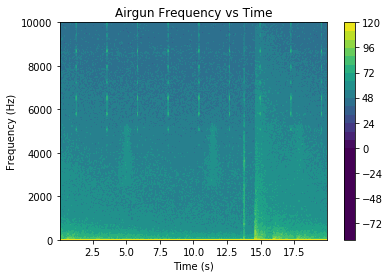

In [8]:
data = read('https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed')
fs = 64000
timeStart = data[0].stats.starttime
timeEnd = data[0].stats.starttime + 20
sliced = data.slice(timeStart, timeEnd)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  
per_lap = 0.90      
nlap = int(nfft * float(per_lap))   

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Airgun Frequency vs Time')
plt.colorbar()
plt.ylim(0, 10000)

Plotting Spectrogram for Earthquake Frequency vs Time

(0, 100)

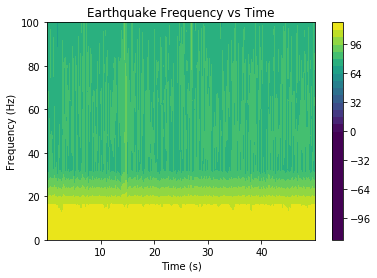

In [9]:
data = read('https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2017/04/15/OO-HYEA1--YDH-2017-04-15T14:45:00.000000.mseed')
fs = 64000
timeStart = data[0].stats.starttime + 154
timeEnd = data[0].stats.starttime +204
sliced = data.slice(timeStart, timeEnd)
npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  
per_lap = 0.90      
nlap = int(nfft * float(per_lap))   

specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Earthquake Frequency vs Time')
plt.colorbar()
plt.ylim(0, 100)